# Data Analysis Visualization

## General Plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def plot_predicted_vs_actual(predicted_matrix, actual_matrix):
    """
    Plot predicted vs. actual average oxidation states and calculate RMSD.

    Parameters:
        predicted_matrix (numpy.ndarray): 4000x8 matrix of predicted normalized oxidation states (0-1).
        actual_matrix (numpy.ndarray): 4000x8 matrix of actual normalized oxidation states (0-1).
    Returns:
        float: RMSD (Root Mean Square Deviation) between predicted and actual oxidation states.
    """
    assert predicted_matrix.shape == actual_matrix.shape, "Predicted and actual matrices must have the same shape."
    assert predicted_matrix.shape[1] == 8, "Each matrix must have 8 columns for oxidation states."
    
    # Define the oxidation states: [0, 1, 2, ..., 7]
    oxidation_states = np.arange(8).reshape(-1, 1)  # Shape: (8, 1)
    
    # Compute the average oxidation states for each sample
    predicted_avg = np.dot(predicted_matrix, oxidation_states).flatten()  # Shape: (4000,)
    actual_avg = np.dot(actual_matrix, oxidation_states).flatten()        # Shape: (4000,)
    
    # Calculate RMSD
    rmsd = np.sqrt(mean_squared_error(actual_avg, predicted_avg))
    
    # Plot predicted vs. actual
    plt.figure(figsize=(8, 6))
    plt.scatter(actual_avg, predicted_avg, alpha=0.5, label=f'RMSD: {rmsd:.4f}', color='royalblue')
    plt.plot([0, 7], [0, 7], color='red', linestyle='--', label='Perfect Prediction')
    plt.xlabel('Ground Truth Oxidation State')
    plt.ylabel('Predicted Average Oxidation State')
    plt.title('Predicted vs Ground Truth Oxidation States')
    plt.legend()
    plt.show()
    
    return rmsd


## Error Histogram (overall)

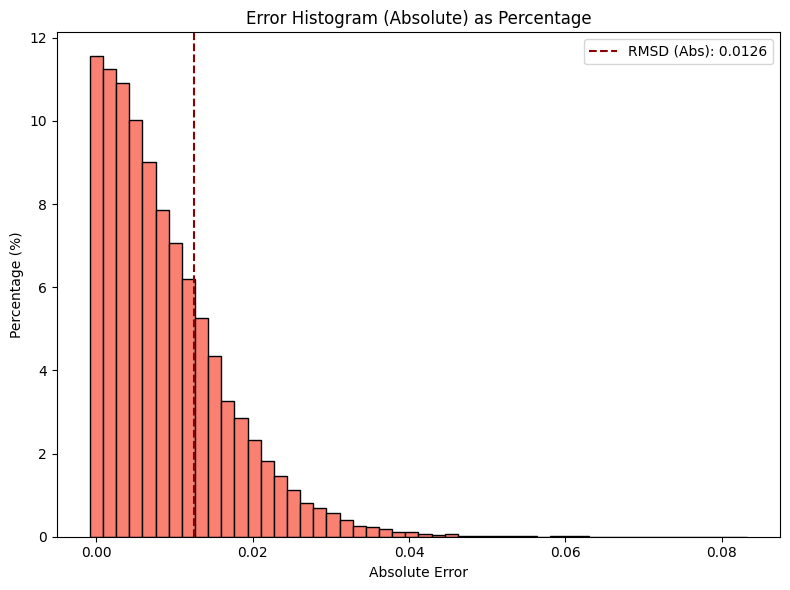

In [2]:
def plot_error_histogram(predicted_matrix, actual_matrix, bins=50):
    """
    Plot a histogram of the errors between predicted and actual matrices as percentages.

    Parameters:
        predicted_matrix (numpy.ndarray): Predicted values (4000x8).
        actual_matrix (numpy.ndarray): Actual values (4000x8).
        bins (int): Number of bins for the histogram.
    """
    # Calculate the element-wise error
    error = predicted_matrix - actual_matrix  # Raw error
    absolute_error = np.abs(error)            # Absolute error
    
    # Flatten the error matrices for histogram plotting
    abs_error_flat = absolute_error.flatten()
    
    # Calculate RMSD for absolute error
    rmsd_abs = np.sqrt(np.mean(abs_error_flat**2))  # RMSD for absolute error
    
    # Calculate histogram data without plotting
    counts, bin_edges = np.histogram(abs_error_flat, bins=bins, density=True)
    bin_width = bin_edges[1] - bin_edges[0]  # Width of each bin
    
    # Convert counts to percentages
    counts_percentage = counts * 100 * bin_width
    
    # Plot the histogram as percentages
    plt.figure(figsize=(8, 6))
    plt.bar(bin_edges[:-1], counts_percentage, width=bin_width, 
            color='salmon', edgecolor='black')

    # Add RMSD line
    plt.axvline(rmsd_abs, color='darkred', linestyle='--', label=f'RMSD (Abs): {rmsd_abs:.4f}')
    plt.title('Error Histogram (Absolute) as Percentage')
    plt.xlabel('Absolute Error')
    plt.ylabel('Percentage (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()



# Example input matrices (normalized)
np.random.seed(42)
actual_matrix = np.random.rand(4000, 8)
predicted_matrix = actual_matrix + np.random.normal(0, 0.05, size=(4000, 8))
predicted_matrix = np.clip(predicted_matrix, 0, 1)

# Normalize rows to sum to 1
actual_matrix /= actual_matrix.sum(axis=1, keepdims=True)
predicted_matrix /= predicted_matrix.sum(axis=1, keepdims=True)

# Call the function
plot_error_histogram(predicted_matrix, actual_matrix)

## Error Histogram (each oxidation state)

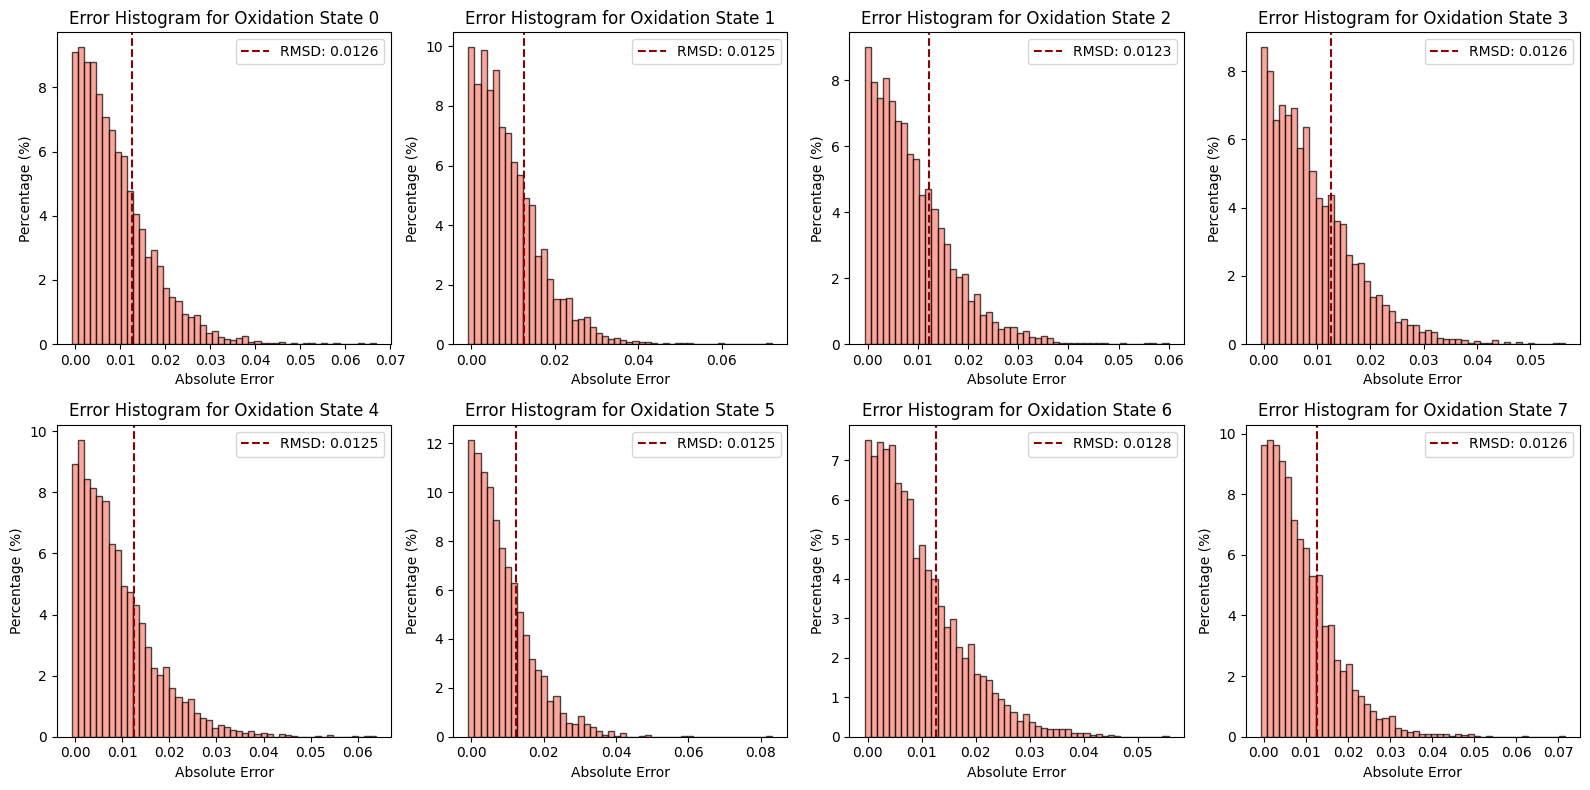

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_oxidation_state_error_histograms(predicted_matrix, actual_matrix, bins=50):
    """
    Plot histograms of errors for each oxidation state (0-7) as percentages.

    Parameters:
        predicted_matrix (numpy.ndarray): Predicted values (4000x8).
        actual_matrix (numpy.ndarray): Actual values (4000x8).
        bins (int): Number of bins for the histograms.
    """
    # Calculate the element-wise error for each oxidation state
    error = predicted_matrix - actual_matrix  # Raw error
    absolute_error = np.abs(error)            # Absolute error

    # Prepare for plotting histograms for each oxidation state (0-7)
    oxidation_states = np.arange(8)
    
    # Create subplots
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows and 4 columns of subplots
    axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing
    
    for i, oxidation_state in enumerate(oxidation_states):
        # Extract the absolute error for the current oxidation state
        absolute_error_oxidation = absolute_error[:, oxidation_state]
        
        # Calculate histogram data without plotting
        counts, bin_edges = np.histogram(absolute_error_oxidation, bins=bins, density=True)
        bin_width = bin_edges[1] - bin_edges[0]  # Width of each bin

        # Convert counts to percentages
        counts_percentage = counts * 100 * bin_width

        # Calculate RMSD for absolute error
        rmsd_abs = np.sqrt(np.mean(absolute_error_oxidation**2))

        # Plot the histogram as percentages
        axes[i].bar(bin_edges[:-1], counts_percentage, width=bin_width, 
                    color='salmon', edgecolor='black', alpha=0.7)

        # Add RMSD vertical line
        axes[i].axvline(rmsd_abs, color='darkred', linestyle='--', label=f'RMSD: {rmsd_abs:.4f}')
        
        # Set titles and labels
        axes[i].set_title(f'Error Histogram for Oxidation State {oxidation_state}')
        axes[i].set_xlabel('Absolute Error')
        axes[i].set_ylabel('Percentage (%)')
        #axes[i].set_xlim(0, 1)  # Set x-axis range from 0 to 1
        axes[i].legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

    return 

# Example input matrices (normalized)
np.random.seed(42)
actual_matrix = np.random.rand(4000, 8)
predicted_matrix = actual_matrix + np.random.normal(0, 0.05, size=(4000, 8))
predicted_matrix = np.clip(predicted_matrix, 0, 1)

# Normalize rows to sum to 1
actual_matrix /= actual_matrix.sum(axis=1, keepdims=True)
predicted_matrix /= predicted_matrix.sum(axis=1, keepdims=True)

# Call the function
plot_oxidation_state_error_histograms(predicted_matrix, actual_matrix)



## Confusion Matrix of Integer Valence States

In [4]:
def filter_rows_by_oxidation_state(predicted_matrix, actual_matrix, tolerance=0.1):
    """
    Filter rows in the actual and predicted matrices where the normalized oxidation state 
    is close to an integer (within the given tolerance).

    Parameters:
        actual_matrix (numpy.ndarray): The actual oxidation state matrix (4000x8).
        predicted_matrix (numpy.ndarray): The predicted oxidation state matrix (4000x8).
        tolerance (float): The tolerance within which we consider a value close to an integer (default: 0.1).
    
    Returns:
        filtered_actual (numpy.ndarray): Reduced actual matrix with valid rows.
        filtered_predicted (numpy.ndarray): Reduced predicted matrix with corresponding valid rows.
        removed_count (int): Number of rows removed from actual matrix.
        incorrect_removed_count (int): Number of incorrectly removed rows in predicted matrix.
    """
    # Define the oxidation states: [0, 1, 2, ..., 7]
    oxidation_states = np.arange(8)  # Shape: (8,)

    # Calculate the average oxidation state for each row (sample) in the actual and predicted matrices
    actual_avg = np.dot(actual_matrix, oxidation_states)      # Shape: (4000,)
    predicted_avg = np.dot(predicted_matrix, oxidation_states)  # Shape: (4000,)

    # Identify rows where actual_avg is close to an integer (within tolerance)
    is_valid_row = np.abs(actual_avg - np.round(actual_avg)) < tolerance

    # Filter actual and predicted matrices based on valid rows
    filtered_actual = actual_matrix[is_valid_row]          # Keep valid rows in actual_matrix
    filtered_predicted = predicted_matrix[is_valid_row]    # Keep corresponding rows in predicted_matrix

    # Count the rows that were removed
    removed_count = actual_matrix.shape[0] - filtered_actual.shape[0]

    # Count the number of incorrectly removed rows in the predicted matrix
    incorrect_removed_count = np.sum(np.abs(predicted_avg[~is_valid_row] - np.round(actual_avg[~is_valid_row])) >= tolerance)
    
    # Print results
    print(f"Rows removed from actual matrix: {removed_count}")
    print(f"Incorrectly removed rows from predicted matrix: {incorrect_removed_count}")
    print(f"Filtered Actual Matrix Shape: {filtered_actual.shape}")
    print(f"Filtered Predicted Matrix Shape: {filtered_predicted.shape}")

    return filtered_actual, filtered_predicted, removed_count, incorrect_removed_count


# Example input matrices (normalized)
np.random.seed(42)
actual_matrix = np.random.rand(4000, 8)
predicted_matrix = actual_matrix + np.random.normal(0, 0.05, size=(4000, 8))
predicted_matrix = np.clip(predicted_matrix, 0, 1)

# Normalize rows to sum to 1
actual_matrix /= actual_matrix.sum(axis=1, keepdims=True)
predicted_matrix /= predicted_matrix.sum(axis=1, keepdims=True)

# Call the function
filtered_actual, filtered_predicted, removed_count, incorrect_removed_count = filter_rows_by_oxidation_state(actual_matrix, predicted_matrix)



Rows removed from actual matrix: 3172
Incorrectly removed rows from predicted matrix: 2928
Filtered Actual Matrix Shape: (828, 8)
Filtered Predicted Matrix Shape: (828, 8)


<Figure size 800x600 with 0 Axes>

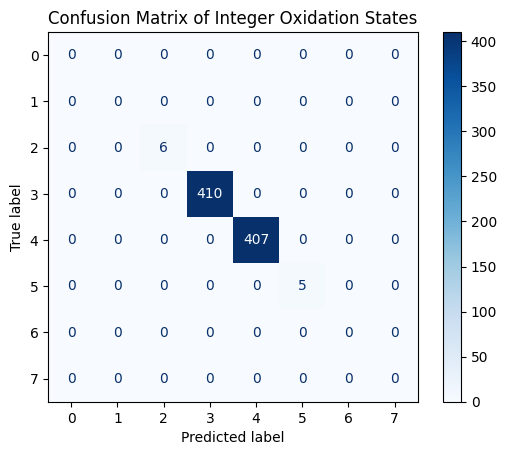

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def generate_confusion_matrix(filtered_actual, filtered_predicted):
    """
    Generate a confusion matrix comparing integer oxidation states of actual and predicted matrices.

    Parameters:
        filtered_actual (numpy.ndarray): Filtered actual oxidation states matrix.
        filtered_predicted (numpy.ndarray): Filtered predicted oxidation states matrix.
    
    Returns:
        None: Displays the confusion matrix plot.
    """
    # Define the oxidation states: [0, 1, 2, ..., 7]
    oxidation_states = np.arange(8)  # Shape: (8,)

    # Compute average oxidation states for filtered matrices
    actual_avg = np.dot(filtered_actual, oxidation_states)  # Shape: (num_filtered_rows,)
    predicted_avg = np.dot(filtered_predicted, oxidation_states)

    # Round averages to nearest integer oxidation states
    actual_int = np.round(actual_avg).astype(int)
    predicted_int = np.round(predicted_avg).astype(int)

    # Generate confusion matrix
    cm = confusion_matrix(actual_int, predicted_int, labels=oxidation_states)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=oxidation_states)
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix of Integer Oxidation States")
    plt.show()
    
    return 

# Assuming `filtered_actual` and `filtered_predicted` come from the previous function
generate_confusion_matrix(filtered_actual, filtered_predicted)


## Testing of Visualization

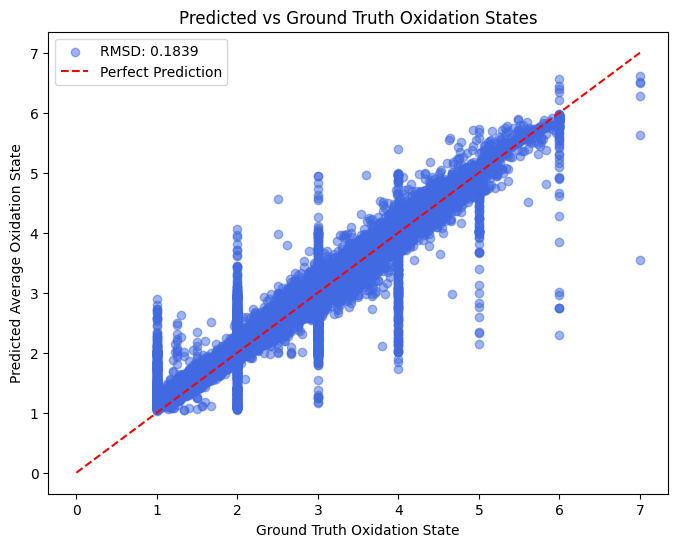

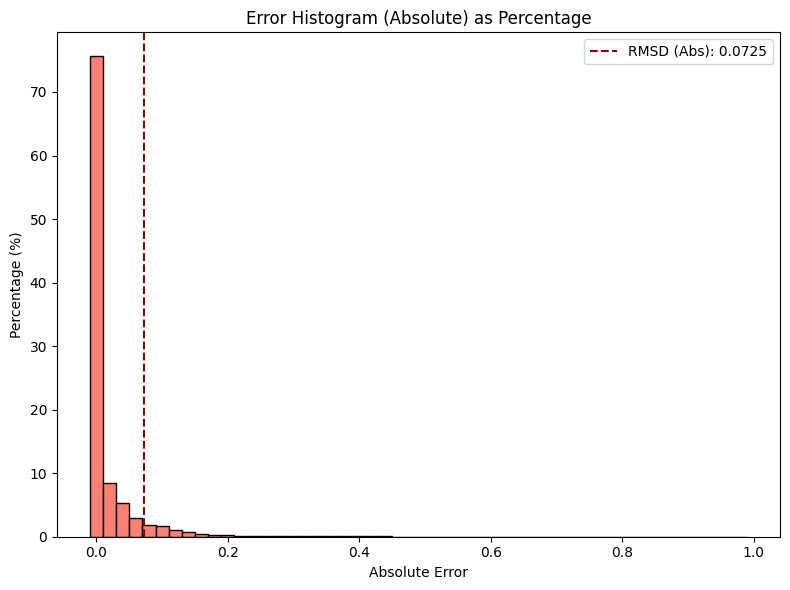

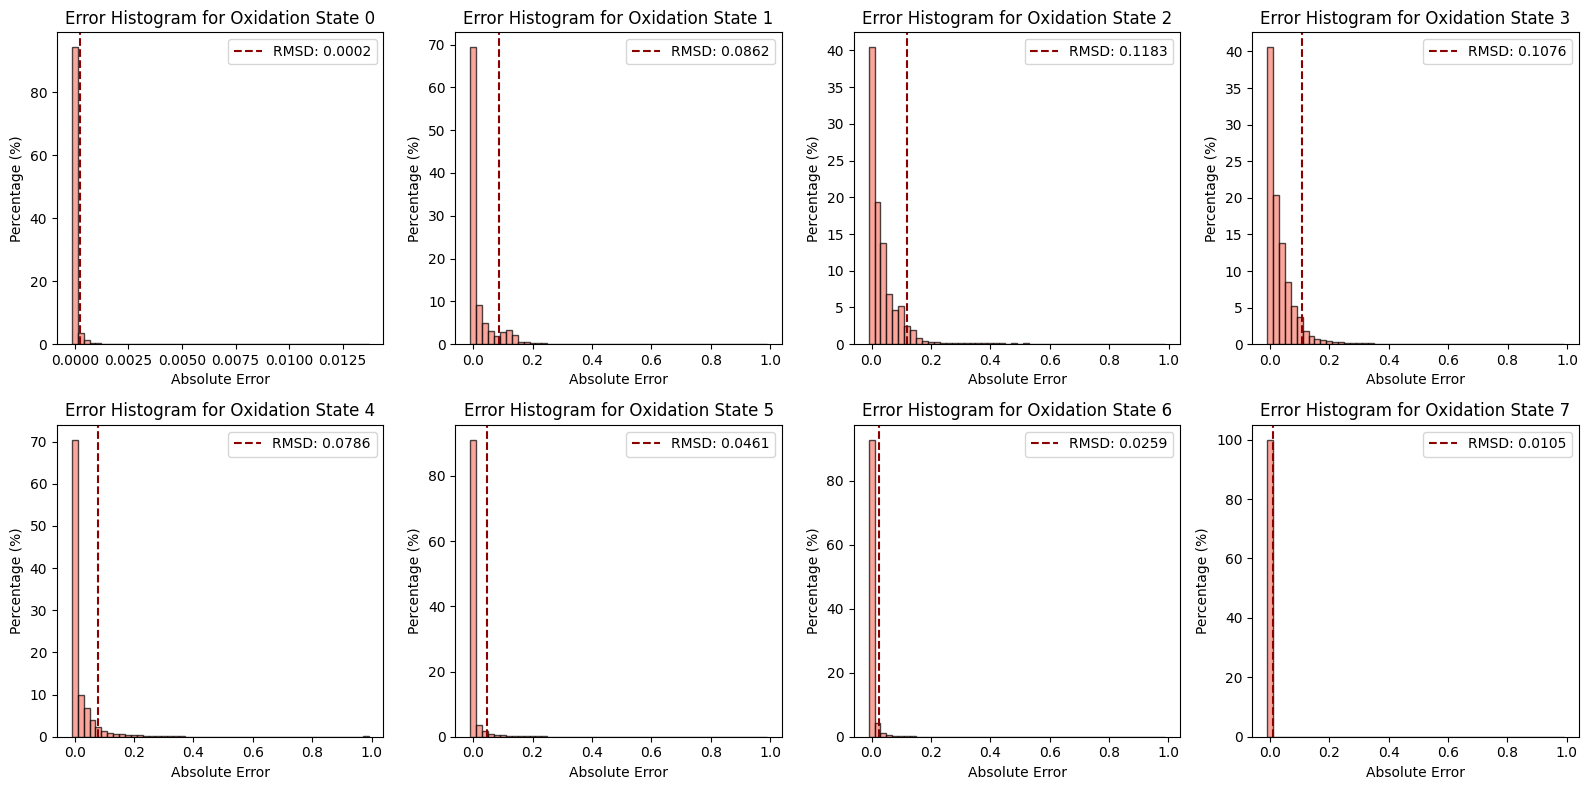

Rows removed from actual matrix: 34947
Incorrectly removed rows from predicted matrix: 32042
Filtered Actual Matrix Shape: (13987, 8)
Filtered Predicted Matrix Shape: (13987, 8)


<Figure size 800x600 with 0 Axes>

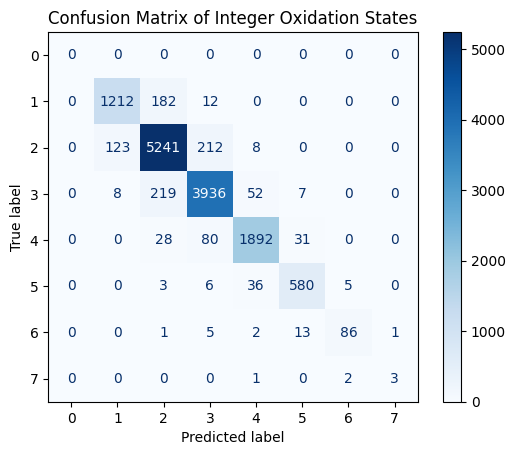

In [6]:
import numpy as np

pred = np.load('output_fnn.npy')
actual = np.load('y_test_used.npy')

def normalize_rows(matrix):
    """
    Normalize each row of the matrix to sum to 1.

    Parameters:
        matrix (numpy.ndarray): Input matrix of shape (4000, 8).

    Returns:
        numpy.ndarray: Row-normalized matrix.
    """
    # Avoid division by zero: replace rows that sum to 0 with small epsilon
    row_sums = matrix.sum(axis=1, keepdims=True)  # Shape: (4000, 1)
    row_sums[row_sums == 0] = 1e-10  # Replace zero rows with epsilon to prevent division by zero
    
    # Divide each element by the row sum
    normalized_matrix = matrix / row_sums
    
    return normalized_matrix

norm_pred = normalize_rows(pred)
norm_actual = normalize_rows(actual)

plot_predicted_vs_actual(norm_pred, norm_actual)
plot_error_histogram(norm_pred, norm_actual)
plot_oxidation_state_error_histograms(norm_pred, norm_actual)

filtered_actual, filtered_predicted, removed_count, incorrect_removed_count = filter_rows_by_oxidation_state(norm_pred, norm_actual)

generate_confusion_matrix(filtered_actual, filtered_predicted)